## Import all relevant packages

In [3]:
#Import all relevant packages
import pandas as pd
import geopandas as gpd

import numpy as np
from shapely.geometry import Point
from tqdm import tqdm, tqdm_notebook

import missingno as msno
from pandas_profiling import ProfileReport

import seaborn as sns
import folium

## Load all historical data from Jan 2021 to Jan 2022

In [32]:
# list all files in the directory, assuming this directory 
# contains only files csv files that you need to save 
path = r"C:\Users\cahyodha\OneDrive - Danone\Personal\Phyton Notebook\PersonalExplore\Data\divvy tripdata"

# Create empty dataframe to store the final result
df1 = pd.DataFrame()
# for every file on the path, iterate
for file in os.listdir(path):
    # read the file
    df = pd.read_csv(path+ "\\" +file)
    # append the file into the result dataframe
    df1 = pd.concat([df1, df], ignore_index=True, sort=False)
    df = pd.DataFrame()
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [33]:
# Calculate time spent on each ride
df2 = df1
df2["started_time"] = pd.to_datetime(df1["started_at"].values)
df2["ended_time"] = pd.to_datetime(df1["ended_at"].values)
df2["timespent"] = df1["ended_time"].values - df1["started_time"].values
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_time,ended_time,timespent
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,2021-01-23 16:14:19,2021-01-23 16:24:44,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2021-01-27 18:43:08,2021-01-27 18:47:12,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,2021-01-21 22:35:54,2021-01-21 22:37:14,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,2021-01-07 13:31:13,2021-01-07 13:42:55,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,2021-01-23 02:24:02,2021-01-23 02:24:45,0 days 00:00:43


In [35]:
dfTemp = df2[df2.timespent <= np.timedelta64(0, 's')]
dfTemp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_time,ended_time,timespent
6592,FC1EFEF4475D7F56,classic_bike,2021-01-09 15:42:45,2021-01-09 15:41:02,Monticello Ave & Irving Park Rd,KA1504000139,NaN,NaN,41.954005,-87.719128,NaN,NaN,member,2021-01-09 15:42:45,2021-01-09 15:41:02,-1 days +23:58:17
35676,6B51296F8E269F2F,classic_bike,2021-01-15 16:40:47,2021-01-15 16:40:47,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,NaN,NaN,41.901315,-87.677409,41.900000,-87.680000,member,2021-01-15 16:40:47,2021-01-15 16:40:47,0 days 00:00:00
35752,B1235D38EB2F8A9E,electric_bike,2021-01-06 18:33:12,2021-01-06 18:31:07,Daley Center Plaza,TA1306000010,NaN,NaN,41.883944,-87.629307,41.880000,-87.630000,member,2021-01-06 18:33:12,2021-01-06 18:31:07,-1 days +23:57:55
60891,3F02776D0D38F96E,classic_bike,2021-01-29 21:02:41,2021-01-29 21:02:41,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872187,-87.661501,41.872187,-87.661501,member,2021-01-29 21:02:41,2021-01-29 21:02:41,0 days 00:00:00
73012,417EE43395E20C71,electric_bike,2021-01-14 17:30:55,2021-01-14 17:30:55,Desplaines St & Kinzie St,TA1306000003,NaN,NaN,41.888612,-87.644438,41.890000,-87.640000,member,2021-01-14 17:30:55,2021-01-14 17:30:55,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616654,C2E047DDF019C255,electric_bike,2022-01-18 19:25:42,2022-01-18 19:25:42,Green St & Madison St,TA1307000120,NaN,NaN,41.881783,-87.648608,41.880000,-87.650000,member,2022-01-18 19:25:42,2022-01-18 19:25:42,0 days 00:00:00
5676383,8D3E8E511FEB11CC,electric_bike,2022-01-21 01:05:35,2022-01-21 01:05:35,Western Ave & Winnebago Ave,13068,NaN,NaN,41.915525,-87.687039,41.920000,-87.690000,casual,2022-01-21 01:05:35,2022-01-21 01:05:35,0 days 00:00:00
5692082,A753A729011B4289,electric_bike,2022-01-09 10:39:48,2022-01-09 10:39:48,Clark St & Bryn Mawr Ave,KA1504000151,NaN,NaN,41.983567,-87.669127,41.980000,-87.670000,member,2022-01-09 10:39:48,2022-01-09 10:39:48,0 days 00:00:00
5692428,0C63D14D261205FA,electric_bike,2022-01-28 15:28:11,2022-01-28 15:28:11,Wells St & Hubbard St,TA1307000151,NaN,NaN,41.890174,-87.634231,41.890000,-87.630000,casual,2022-01-28 15:28:11,2022-01-28 15:28:11,0 days 00:00:00


In [6]:
def haversine(lat1, lng1, lat2, lng2):
    # km constant
    metric_constant = 6371
    lat1, lng1, lat2, lng2 = map(np.deg2rad, [lat1, lng1, lat2, lng2])
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = metric_constant * c
    return km
df1["distance"] = haversine(df1["start_lat"].values, df1["start_lng"].values, df1["end_lat"].values, df1["end_lng"].values)
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_time,ended_time,timespent,distance
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,2021-01-23 16:14:19,2021-01-23 16:24:44,0 days 00:10:25,2.242244
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,2021-01-27 18:43:08,2021-01-27 18:47:12,0 days 00:04:04,0.556327
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,2021-01-21 22:35:54,2021-01-21 22:37:14,0 days 00:01:20,0.280031
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,2021-01-07 13:31:13,2021-01-07 13:42:55,0 days 00:11:42,2.248210
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,2021-01-23 02:24:02,2021-01-23 02:24:45,0 days 00:00:43,0.275752


In [1]:
# profile = ProfileReport(df1)
# profile.to_widgets()
# profile.to_file("pandas_profile.html")
# profile2 = ProfileReport(df1, explorative=True)
# profile2.to_widgets()
# msno.matrix(df1)
# msno.bar(df1)
df1['timespent_float'] = df1['timespent'].values.astype(int) / 1000
df1['timespent_float']

NameError: name 'df1' is not defined

<AxesSubplot:xlabel='timespent_float', ylabel='distance'>

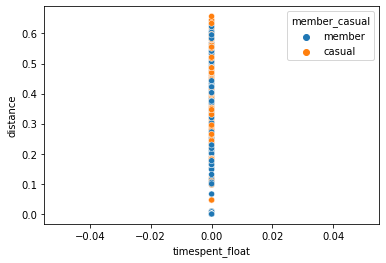

In [15]:
filteredDf = df1[(df1.sditance <= 100) & (df1.timespent_float <= 2.5)]

# filteredDf = np.where((df1['distance']<=200))
# filteredDf.head()
sns.scatterplot(data=filteredDf, x="timespent_float", y="distance", hue="member_casual")


In [ ]:
# loc_center = [df1["start_lat"].mean(), df1["start_lng"].mean()]
# map1 = folium.Map(location = loc_center, tiles="OpenStreetMap", control_scale=True)
# # for index, loc in df1.iterrows():
# #     if loc['member_casual']=='member':
# #         color = 'blue'
# #     elif loc['member_casual']=='casual':
# #         color = "green"
# #     else:
# #         color = 'black'
# #     folium.RegularPolygonMarker([loc['start_lat'], loc['start_lng']], fill_color=color, number_of_sides=3, radius=6, rotation=30).add_to(map1)
# df1.apply(lambda row:folium.CircleMarker(location=[row["start_lat"], row["start_lng"]], 
#                                               radius=10, popup=row['ride_id'])
#                                              .add_to(map1), axis=1)
# # folium.LayerControl().add_to(map1)
# # map1